In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the Dataset

In [2]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,60,61,62,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Exploratory Data Analysis

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'provstate':'State','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','target1':'Target', 'summary':'Summary','gname':'Group','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','motive':'Motive'}, inplace=True)

data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','TargetType','WeaponType','Motive']]

data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [5]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,45964.000000,45964.000000,45964.000000,43479.000000,4.347900e+04,40258.00000,38430.000000
mean,1983.561787,6.313528,15.331477,16.909789,-2.005662e+03,2.07981,1.684439
std,5.065228,3.408719,8.836873,25.246486,4.133294e+05,8.54414,10.243056
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.00000,0.000000
25%,1980.000000,3.000000,8.000000,4.667128,-7.697846e+01,0.00000,0.000000
50%,1984.000000,6.000000,15.000000,14.152916,-1.543001e+01,0.00000,0.000000
75%,1988.000000,9.000000,23.000000,38.908642,2.787027e+01,1.00000,0.000000
max,1991.000000,12.000000,31.000000,64.837778,1.784419e+02,422.00000,751.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45964 entries, 0 to 45963
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        45964 non-null  int64  
 1   Month       45964 non-null  int64  
 2   Day         45964 non-null  int64  
 3   Country     45964 non-null  object 
 4   State       45783 non-null  object 
 5   Region      45964 non-null  object 
 6   City        45964 non-null  object 
 7   Latitude    43479 non-null  float64
 8   Longitude   43479 non-null  float64
 9   AttackType  45964 non-null  object 
 10  Killed      40258 non-null  float64
 11  Wounded     38430 non-null  float64
 12  Target      45582 non-null  object 
 13  Summary     1221 non-null   object 
 14  Group       45963 non-null  object 
 15  TargetType  45964 non-null  object 
 16  WeaponType  45963 non-null  object 
 17  Motive      941 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 6.3+ MB


In [7]:
print(data.info)

<bound method DataFrame.info of        Year  Month  Day             Country        State  \
0      1970      7    2  Dominican Republic          NaN   
1      1970      0    0              Mexico      Federal   
2      1970      1    0         Philippines       Tarlac   
3      1970      1    0              Greece       Attica   
4      1970      1    0               Japan      Fukouka   
...     ...    ...  ...                 ...          ...   
45959  1991      3   30         Philippines  Maguindanao   
45960  1991      3   31              France    Aquitaine   
45961  1991      3   31              France    Aquitaine   
45962  1991      3   31              Greece       Attica   
45963  1991      3   31               Italy        Lazio   

                            Region             City   Latitude   Longitude  \
0      Central America & Caribbean    Santo Domingo  18.456792  -69.951164   
1                    North America      Mexico city  19.371887  -99.086624   
2            

In [8]:
data.shape

(45964, 18)

In [9]:
data.columns.values

array(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'TargetType', 'WeaponType', 'Motive'],
      dtype=object)

In [10]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           181
Region            0
City              0
Latitude       2485
Longitude      2485
AttackType        0
Killed         5706
Wounded        7534
Target          382
Summary       44743
Group             1
TargetType        0
WeaponType        1
Motive        45023
dtype: int64

In [11]:
data["Country"].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [12]:
data['Year'].value_counts()

1989    4324
1990    3887
1988    3721
1984    3495
1987    3183
1985    2915
1983    2870
1986    2860
1979    2662
1980    2662
1981    2586
1982    2544
1978    1526
1977    1319
1991    1003
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
Name: Year, dtype: int64

In [13]:
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991])

In [14]:
data.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,-0.039308,0.013637,-0.321001,0.001430,0.036596,0.016233
Month,-0.039308,1.000000,-0.000486,-0.039382,-0.007999,0.008094,0.014032
Day,0.013637,-0.000486,1.000000,-0.004589,-0.004692,-0.005737,-0.002694
Latitude,-0.321001,-0.039382,-0.004589,1.000000,0.000861,-0.048521,0.028156
Longitude,0.001430,-0.007999,-0.004692,0.000861,1.000000,-0.001886,0.000860
Killed,0.036596,0.008094,-0.005737,-0.048521,-0.001886,1.000000,0.218154
Wounded,0.016233,0.014032,-0.002694,0.028156,0.000860,0.218154,1.000000


Visualization
**`Year wise attack`**

In [16]:
data['Year'].value_counts().head(10)

1989    4324
1990    3887
1988    3721
1984    3495
1987    3183
1985    2915
1983    2870
1986    2860
1979    2662
1980    2662
Name: Year, dtype: int64

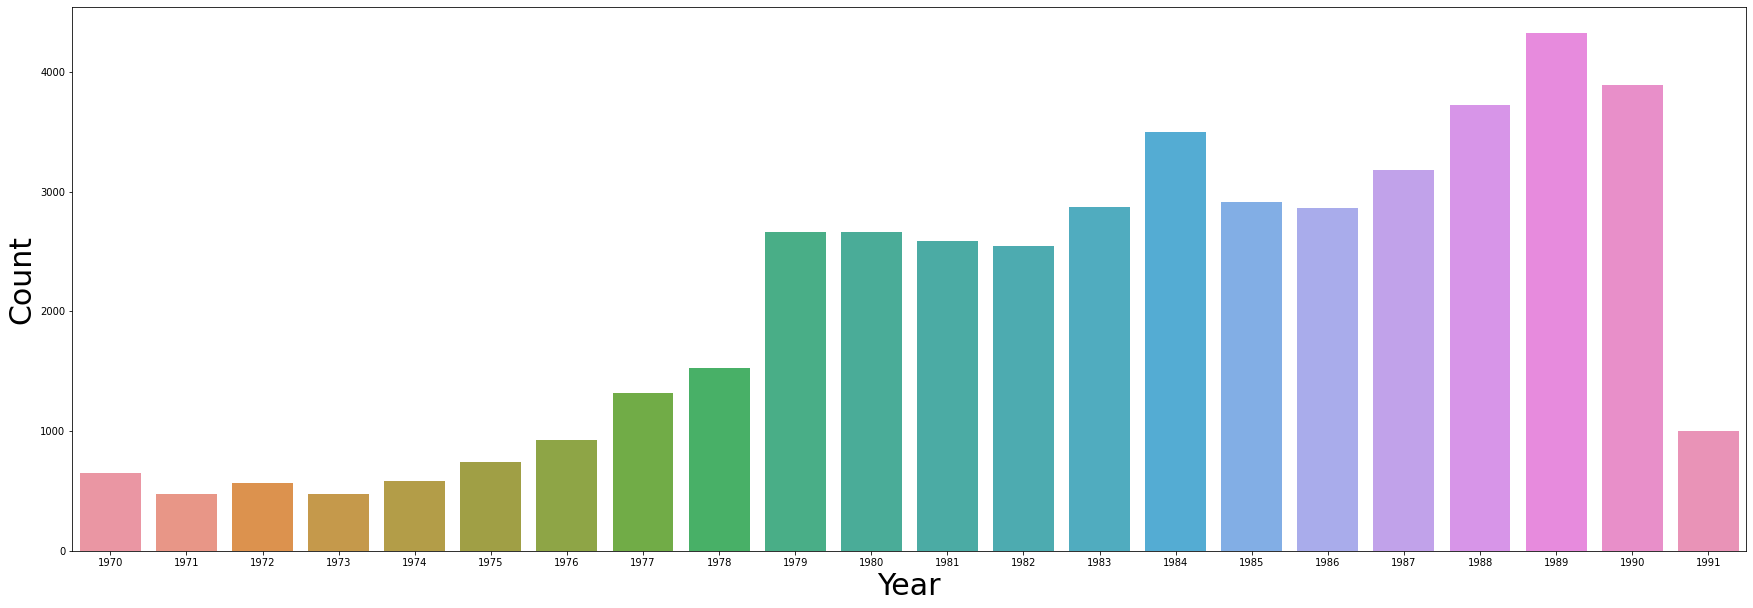

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(data = data, x = 'Year')
plt.xlabel("Year",size=30)
plt.ylabel("Count",size=30)
plt.show()

**Region wise attack**

In [18]:
data['Region'].value_counts().head(10)

South America                  12056
Western Europe                 10041
Central America & Caribbean     8835
Middle East & North Africa      4630
South Asia                      3642
Sub-Saharan Africa              2324
North America                   2206
Southeast Asia                  1682
East Asia                        294
Eastern Europe                   138
Name: Region, dtype: int64

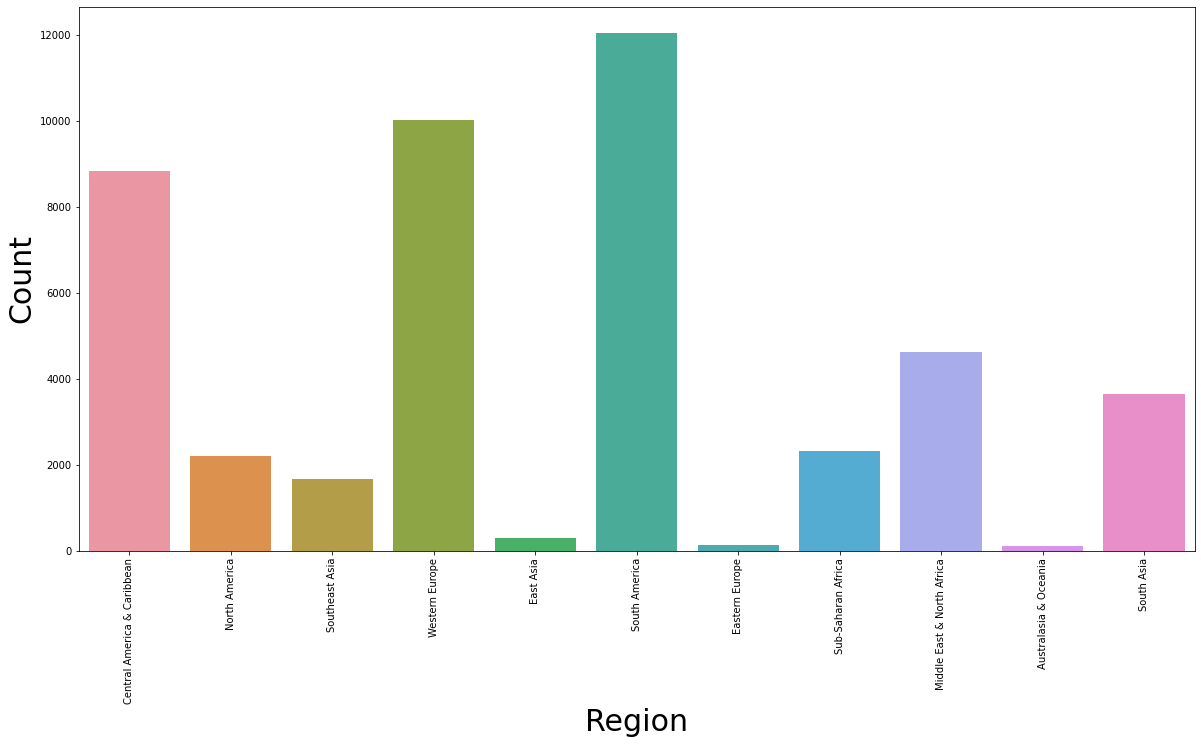

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data = data, x = 'Region')
plt.xticks(rotation = 90)
plt.xlabel("Region",size=30)
plt.ylabel("Count",size=30)
plt.show()

### **Most affected country**

In [20]:
data['Country'].value_counts().head(10)

El Salvador       4829
Peru              4785
Colombia          3882
United Kingdom    3148
Spain             2375
United States     2038
Chile             2010
Nicaragua         1787
Guatemala         1712
India             1648
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


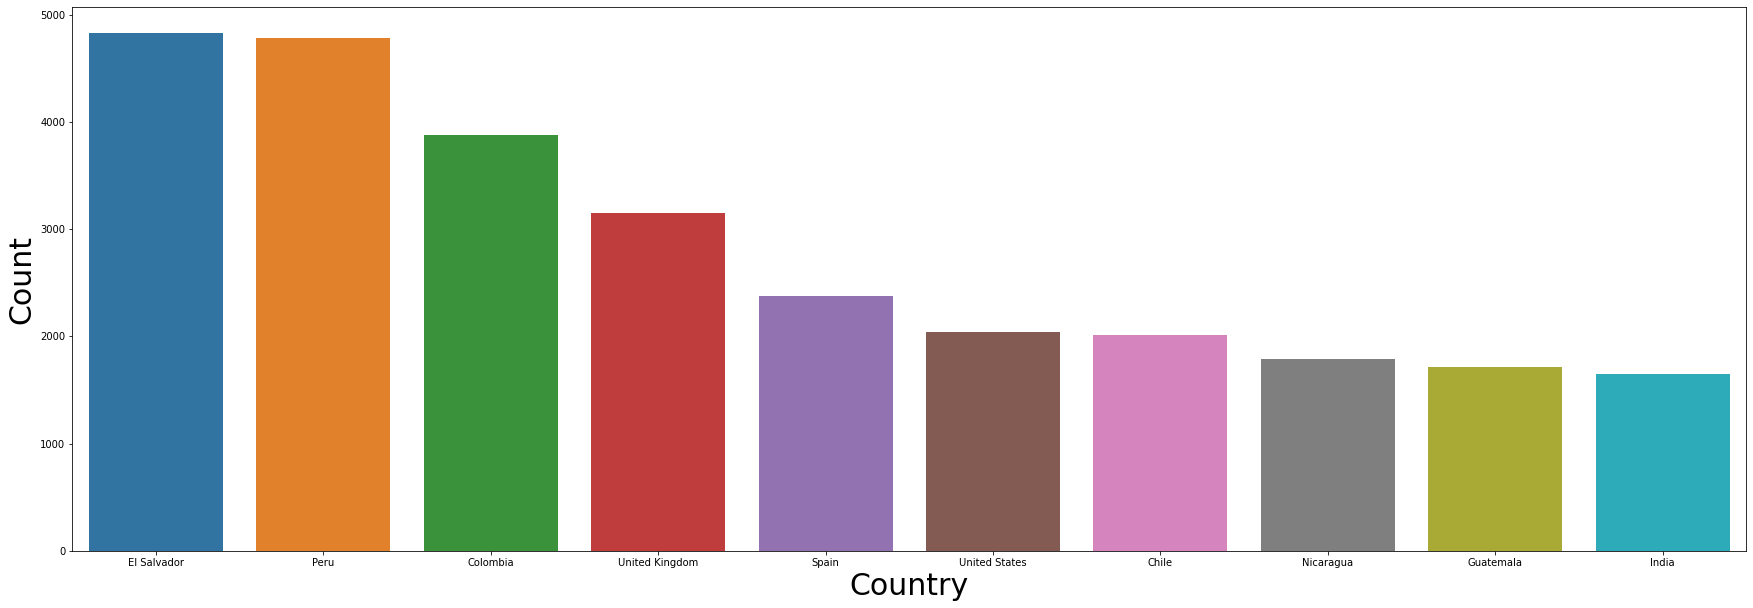

In [21]:
plt.figure(figsize=(30,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.xlabel("Country",size=30)
plt.ylabel("Count",size=30)
plt.show()

### **Affected Cities**

In [22]:
data['City'].value_counts().head(10)

Unknown           2798
Lima              1684
San Salvador      1458
Belfast           1363
Santiago          1356
Beirut             830
Bogota             662
Guatemala City     579
Medellin           523
Paris              514
Name: City, dtype: int64

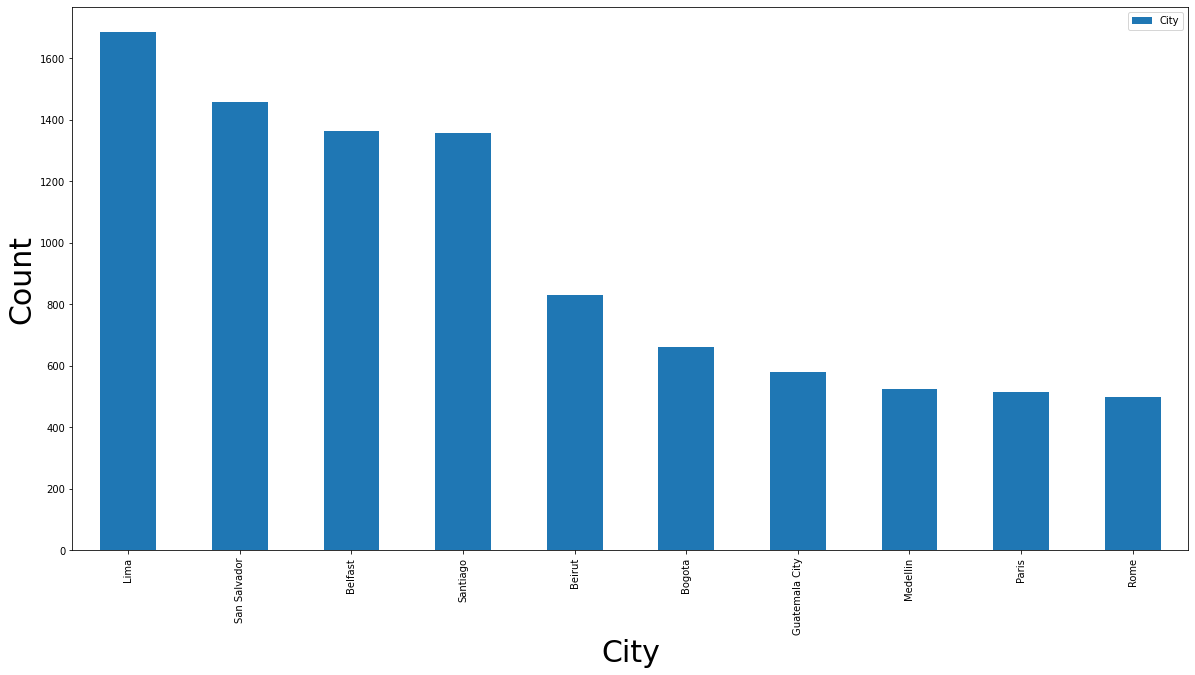

In [23]:
data['City'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.xlabel("City",size=30)
plt.ylabel("Count",size=30)
plt.show()

### **Target type**

In [24]:
data['TargetType'].value_counts().head(10)

Business                       8057
Private Citizens & Property    7583
Military                       7133
Government (General)           5835
Police                         4959
Utilities                      2930
Transportation                 2274
Government (Diplomatic)        1654
Journalists & Media            1057
Educational Institution         957
Name: TargetType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


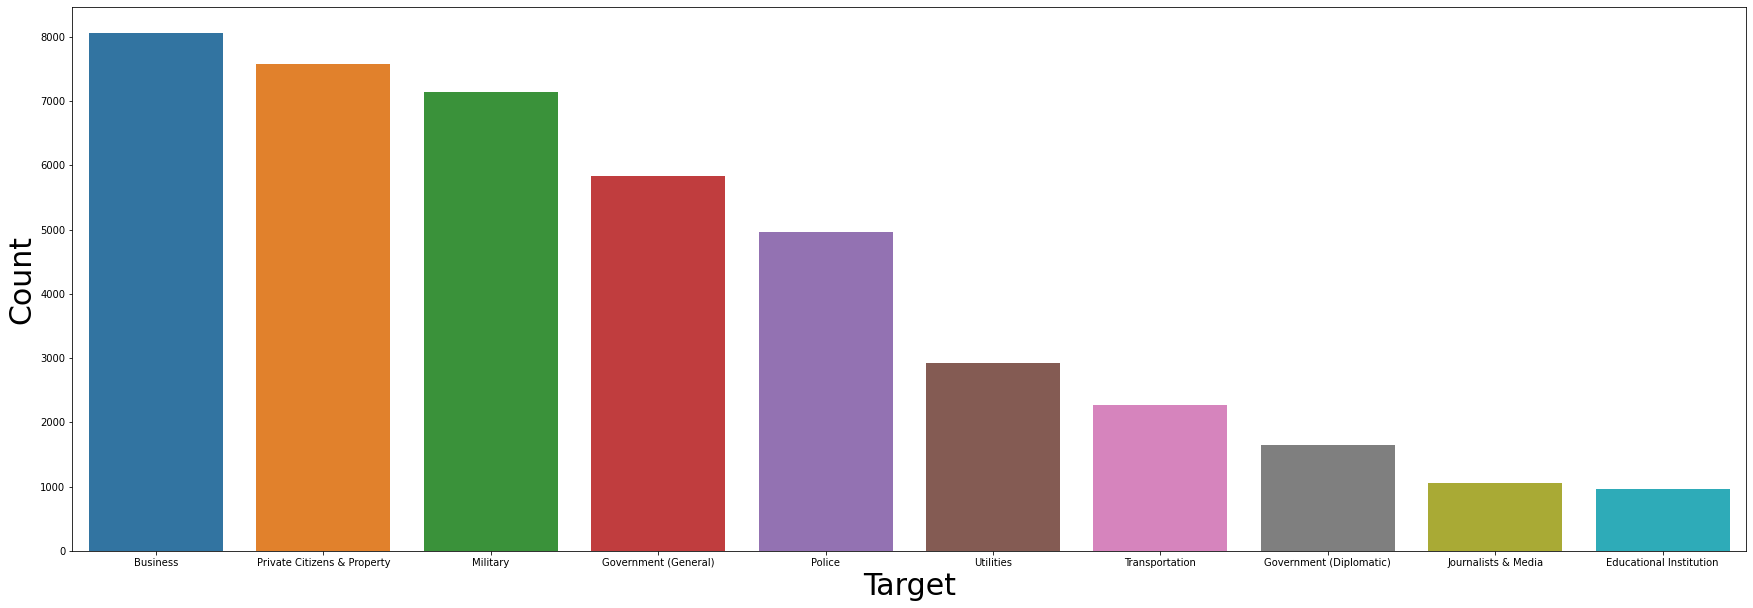

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(data['TargetType'].value_counts()[:10].index,data['TargetType'].value_counts()[:10].values)
plt.xlabel("Target",size=30)
plt.ylabel("Count",size=30)
plt.show()

## **Attack Type**

In [26]:
data['AttackType'].value_counts().head(10)

Bombing/Explosion                      20699
Armed Assault                          10203
Assassination                           8176
Facility/Infrastructure Attack          2949
Hostage Taking (Kidnapping)             1860
Unknown                                 1289
Hostage Taking (Barricade Incident)      524
Hijacking                                187
Unarmed Assault                           77
Name: AttackType, dtype: int64

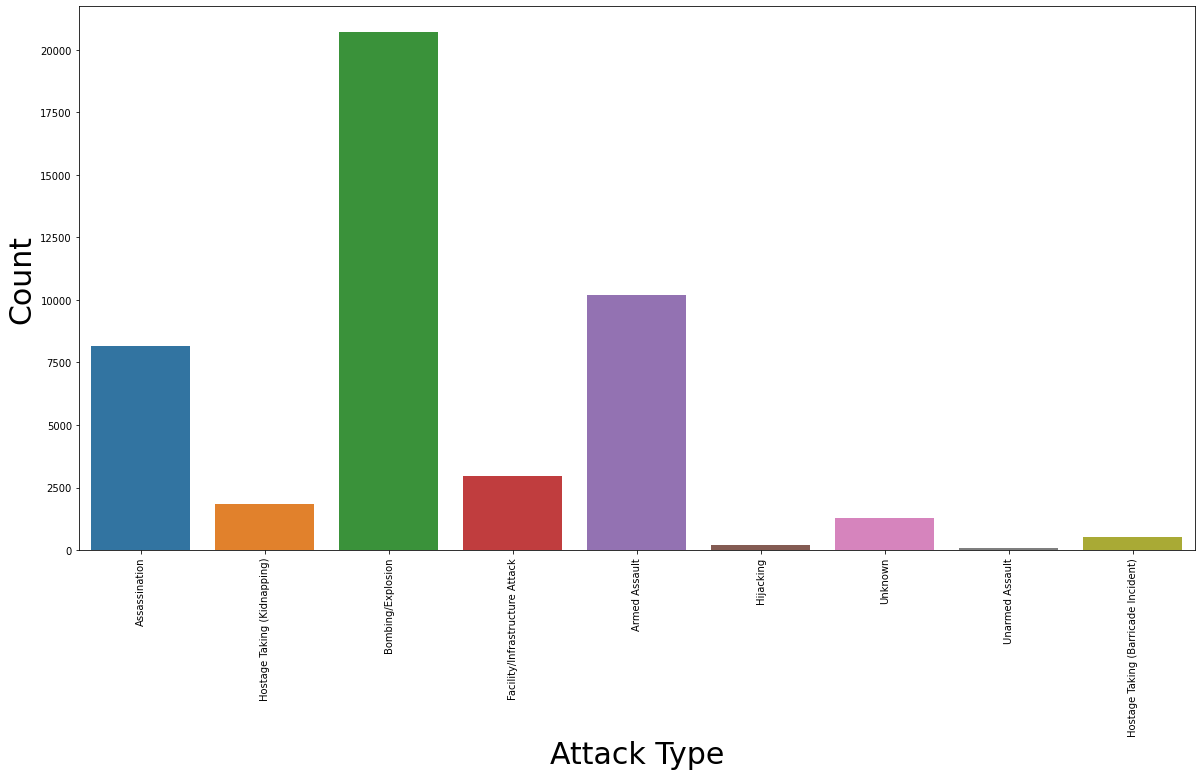

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data = data, x = 'AttackType')
plt.xticks(rotation = 90)
plt.xlabel("Attack Type",size=30)
plt.ylabel("Count",size=30)
plt.show()

## **Country wise Kill**

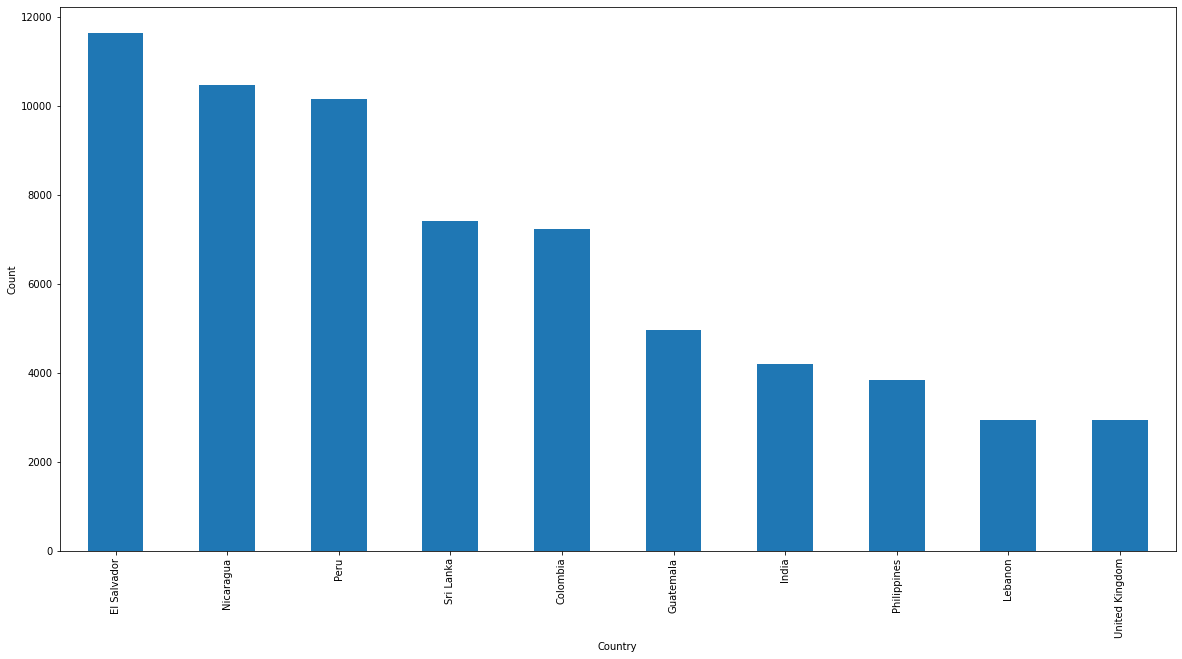

In [28]:
plt.figure(figsize=(20,10))
data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# **Terrorist group**

In [29]:
data['Group'].value_counts().head(10)

Unknown                                             13844
Shining Path (SL)                                    3639
Farabundo Marti National Liberation Front (FMLN)     2926
Irish Republican Army (IRA)                          2103
Basque Fatherland and Freedom (ETA)                  1495
Nicaraguan Democratic Force (FDN)                     895
New People's Army (NPA)                               818
Manuel Rodriguez Patriotic Front (FPMR)               792
Palestinians                                          765
Revolutionary Armed Forces of Colombia (FARC)         738
Name: Group, dtype: int64

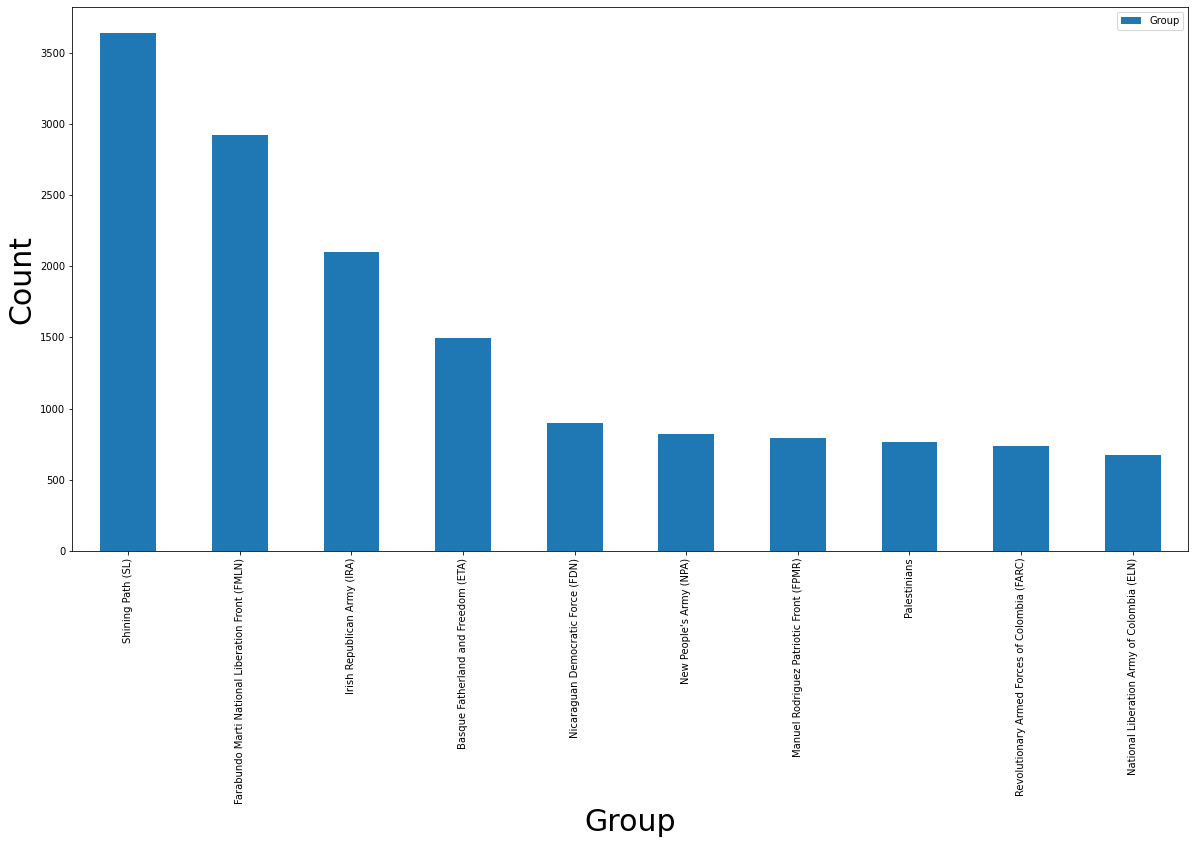

In [30]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.xticks(rotation = 90)
plt.xlabel("Group",size=30)
plt.ylabel("Count",size=30)
plt.show()

# Conclusion
Most active year of terrorism - 2014

Most affected region - Middle East & North Africa

Most affected country - Iraq

Most affected city - Baghdad

Most targeted place - Private citizens and property

Major type of attack used - Bombing/Explosion

Country where more number of people killed - Iraq

Most involved terrorist group - Taliban